# Scraping data from url

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

In [2]:
url = "https://www.worldometers.info/world-population/population-by-country/"
response = requests.get(url)
soup = BeautifulSoup(response.content,'html.parser')
table = soup.find('table')
df = pd.read_html(str(table))[0]
print(df)

       # Country (or dependency)  Population  (2023) Yearly  Change  \
0      1                   India          1428627663         0.81 %   
1      2                   China          1425671352        -0.02 %   
2      3           United States           339996563         0.50 %   
3      4               Indonesia           277534122         0.74 %   
4      5                Pakistan           240485658         1.98 %   
..   ...                     ...                 ...            ...   
229  230              Montserrat                4386        -0.09 %   
230  231        Falkland Islands                3791         0.29 %   
231  232                    Niue                1935         0.05 %   
232  233                 Tokelau                1893         1.18 %   
233  234                Holy See                 518         1.57 %   

     Net  Change  Density  (P/Km²)  Land Area  (Km²)  Migrants  (net)  \
0       11454490               481           2973190          -486136   
1

C:\Users\vidhy\AppData\Local\Temp\ipykernel_7792\2390884529.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


# Data Cleaning and Transfromation

In [4]:
df['Yearly  Change'] = df['Yearly  Change'].str.replace('%', '')

df['Urban  Pop %'] = df['Urban  Pop %'].str.replace('%', '')

df['World  Share'] = df['World  Share'].str.replace('%', '')

In [5]:
df['Yearly  Change'] = df['Yearly  Change'].astype(float) 

df['World  Share'] = df['World  Share'].astype(float)

In [6]:
print(df.dtypes)

#                            int64
Country (or dependency)     object
Population  (2023)           int64
Yearly  Change             float64
Net  Change                  int64
Density  (P/Km²)             int64
Land Area  (Km²)             int64
Migrants  (net)              int64
Fert.  Rate                float64
Med.  Age                  float64
Urban  Pop %                object
World  Share               float64
dtype: object


# Visualizing the data using matplotlib

In [7]:
top_10_population = df.sort_values('Population  (2023)', ascending=False).head(10)

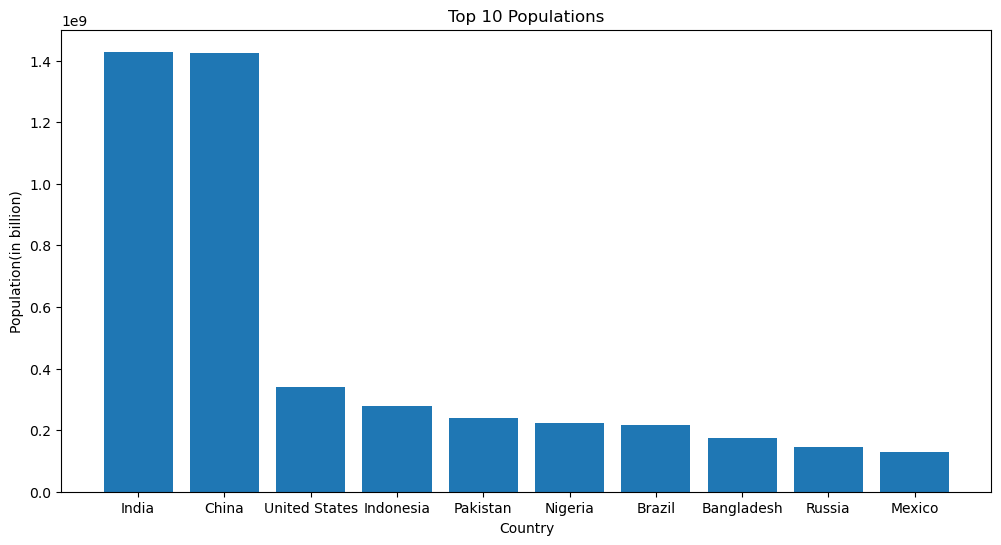

In [8]:
plt.figure(figsize=(12, 6))
x = top_10_population['Country (or dependency)']
y = top_10_population['Population  (2023)']
plt.title('Top 10 Populations')
plt.xlabel('Country')
plt.ylabel('Population(in billion)')
plt.bar(x, y)
plt.show()

In [9]:
top_5_yearly_change = df.sort_values('Yearly  Change', ascending=False).head(5)
low_5_yearly_change = df.sort_values('Yearly  Change', ascending=True).head(5)

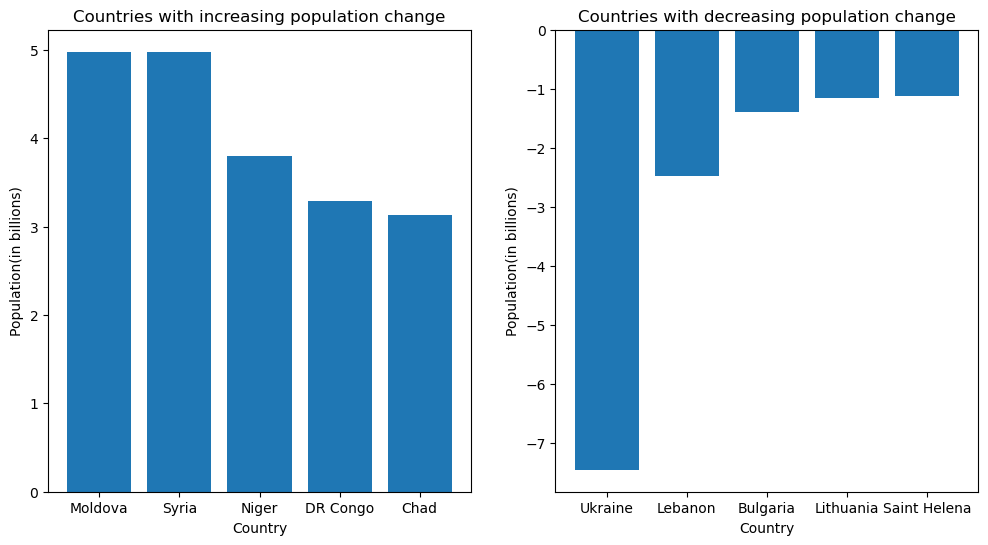

In [10]:
x1 = top_5_yearly_change['Country (or dependency)']
y1 = top_5_yearly_change['Yearly  Change']
x2 = low_5_yearly_change['Country (or dependency)']
y2 = low_5_yearly_change['Yearly  Change']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(x1, y1)
ax1.set_title('Countries with increasing population change')
ax1.set_xlabel('Country')
ax1.set_ylabel('Population(in billions)')

ax2.bar(x2, y2)
ax2.set_title('Countries with decreasing population change')
ax2.set_xlabel('Country')
ax2.set_ylabel('Population(in billions)')

plt.show()

In [11]:
top_10_land_area = df.sort_values('Land Area  (Km²)', ascending=False).head(10)

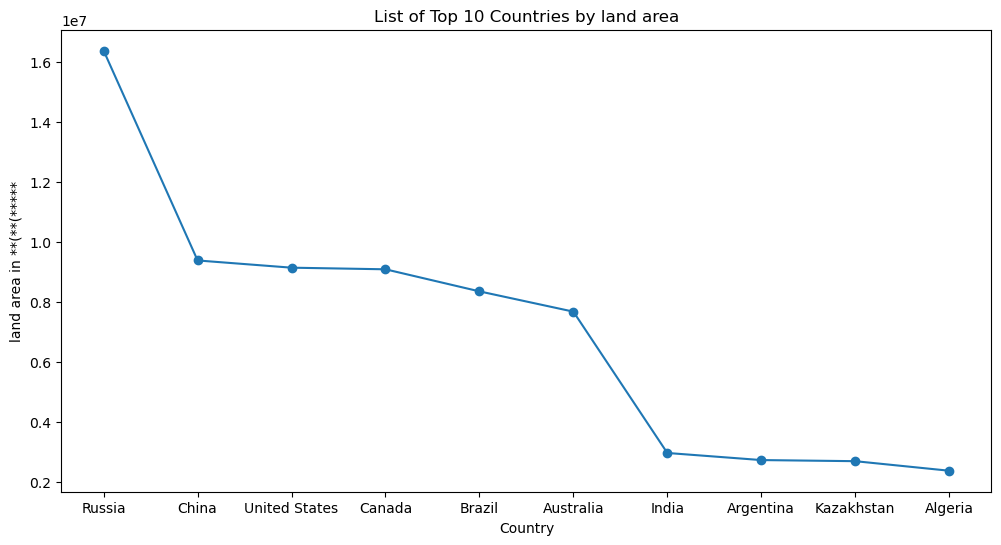

In [12]:
plt.figure(figsize=(12, 6))
x = top_10_land_area['Country (or dependency)']
y = top_10_land_area['Land Area  (Km²)']
plt.title('List of Top 10 Countries by land area')
plt.xlabel('Country')
plt.ylabel('land area in **(**(*****')
plt.plot(x, y,marker='o') 
plt.show()

In [13]:
top_10_world_share = df.sort_values('World  Share', ascending=False).head(10)

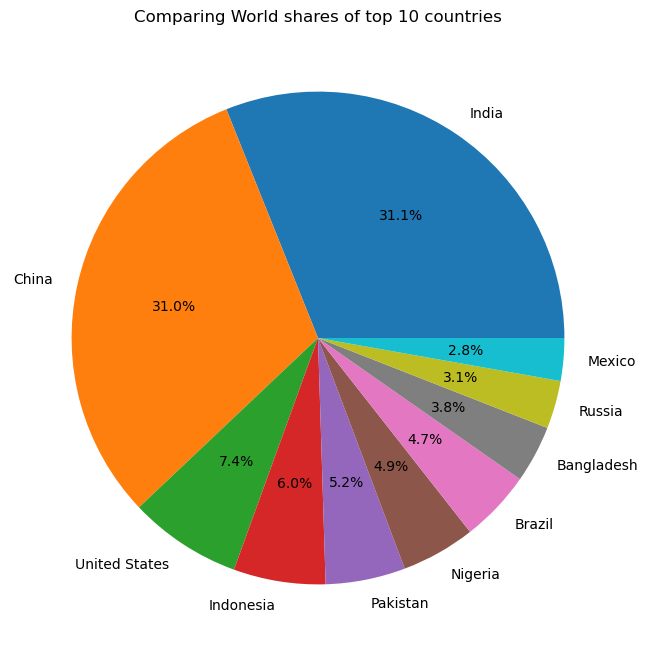

In [14]:
x = top_10_world_share['Country (or dependency)']
y = top_10_world_share['World  Share']

plt.figure(figsize=(12, 8))
plt.title('Comparing World shares of top 10 countries')
plt.pie(y, labels=x,autopct='%1.1f%%')
plt.show()

In [18]:
fertility_rate = df.sort_values('Fert.  Rate', ascending=False)

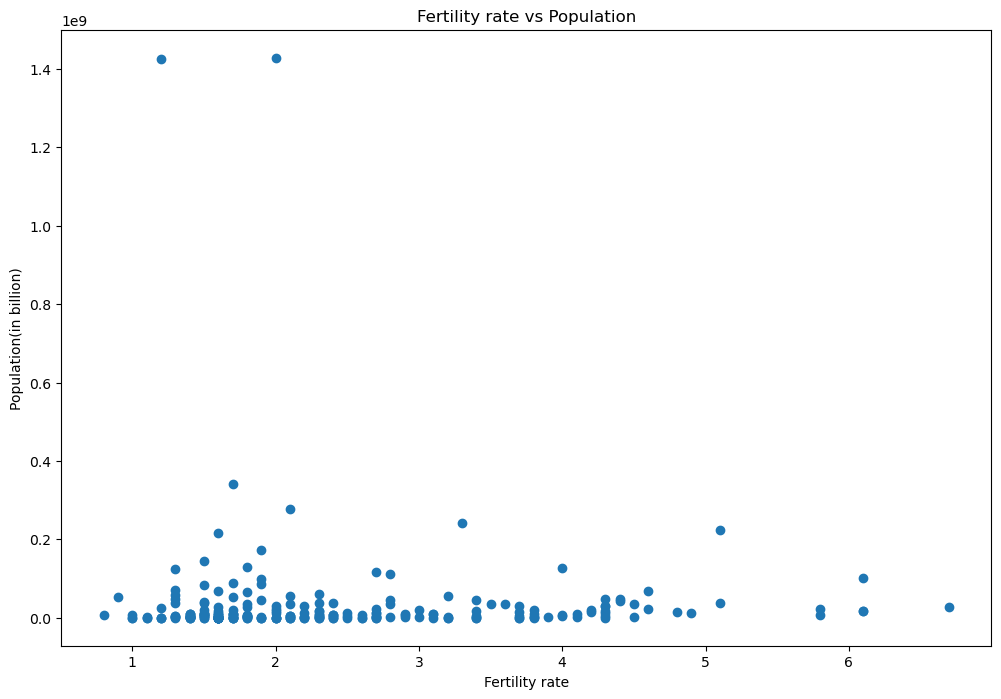

In [15]:
plt.figure(figsize=(12, 8))
x = df['Fert.  Rate']
y = df['Population  (2023)']
plt.title('Fertility rate vs Population')
plt.xlabel('Fertility rate')
plt.ylabel('Population(in billion)')
plt.scatter(x, y)
plt.show()